# Treinamento de processamento visual

## Labiling the image

Incluir label em uma imagem

https://github.com/tzutalin/labelImg

docker pull tzutalin/py2qt4

## Data Albumentations

Criar/derivar imagens com diferentes formatos/transformações.

https://github.com/albumentations-team/albumentations

CNN para classificar imagens do banco CIFAR-10

https://cs.toronto.edu/~kriz/cifar.html

In [1]:
import keras
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Visualize the first 24 traint imagens

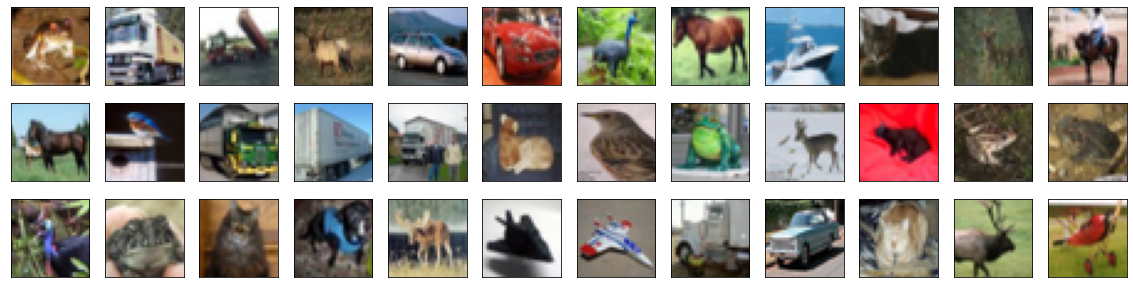

In [2]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20 ,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks = [], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

Rescale the imagens by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0, 255] -> [0, 1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/ 255

Break dataset into training, testing and validation set

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validations sets
(X_train, x_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('X_train shape', X_train.shape)

#print number of training, validation and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation sample')

X_train shape (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation sample


Define the model architeture

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout


model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 500)              

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [13]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=32, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/32

Epoch 00001: val_loss improved from inf to 0.94665, saving model to model.weights.best.hdf5
1407/1407 - 24s - loss: 1.0003 - accuracy: 0.6637 - val_loss: 0.9467 - val_accuracy: 0.6774
Epoch 2/32

Epoch 00002: val_loss did not improve from 0.94665
1407/1407 - 25s - loss: 0.9957 - accuracy: 0.6661 - val_loss: 1.0567 - val_accuracy: 0.6602
Epoch 3/32

Epoch 00003: val_loss did not improve from 0.94665
1407/1407 - 25s - loss: 1.0026 - accuracy: 0.6669 - val_loss: 0.9540 - val_accuracy: 0.6760
Epoch 4/32

Epoch 00004: val_loss did not improve from 0.94665
1407/1407 - 25s - loss: 0.9971 - accuracy: 0.6662 - val_loss: 0.9756 - val_accuracy: 0.6814
Epoch 5/32

Epoch 00005: val_loss improved from 0.94665 to 0.94108, saving model to model.weights.best.hdf5
1407/1407 - 22s - loss: 1.0031 - accuracy: 0.6664 - val_loss: 0.9411 - val_accuracy: 0.6878
Epoch 6/32

Epoch 00006: val_loss did not improve from 0.94108
1407/1407 - 22s - loss: 1.0087 - accuracy: 0.6667 - val_loss: 1.0562 - val_a

In [15]:
model.load_weights('model.weights.best.hdf5')

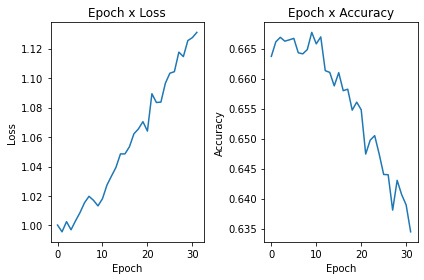

In [32]:
plt.subplot(121)
plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch x Loss')

plt.subplot(122)
plt.plot(hist.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch x Accuracy')

plt.tight_layout()
plt.show()

In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

Test accuracy:  0.6814000010490417


In [35]:
y_hat = model.predict(X_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

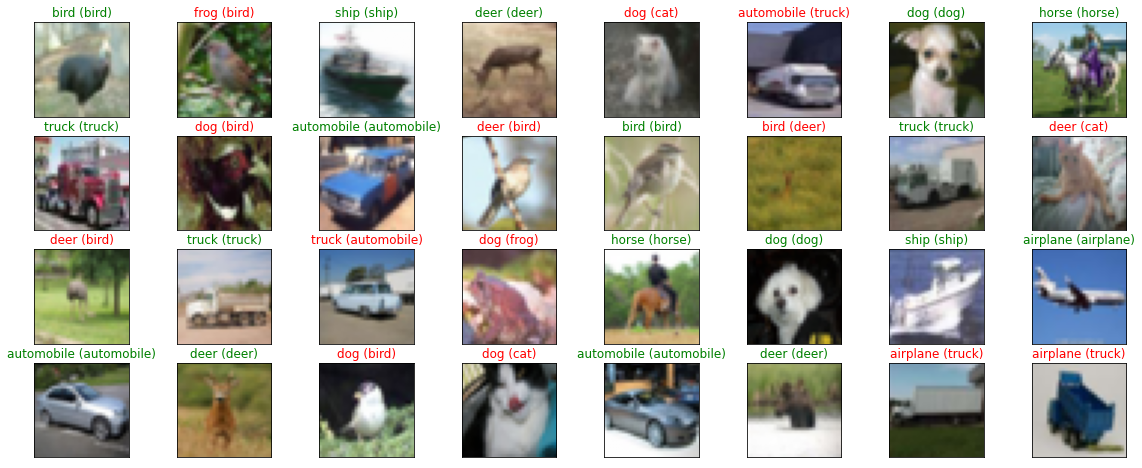

In [37]:
fig = plt.figure(figsize=(20,8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i+ 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title('{} ({})'.format(cifar10_labels[pred_idx], cifar10_labels[true_idx]), color=('green' if pred_idx == true_idx else 'red'))
